# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_neyda import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Step 1: Define the URL
        # completed previously: city_url = f"{url}appid={api_key}&units={units}&q={city}" 
        
        # Step 2: Make the Request
        response = requests.get(city_url)
        
        # Step 3: Check the Status Code
        status_code = response.status_code
        
        # Step 4: Retrieve the data (either .json() or .text()) 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request
        
        # Step 5: Extract the data
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("main", {}).get("humidity")
        city_wind = city_weather.get("clouds", {}).get("all")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass

    # Enforce 1 request per second 
    time.sleep(1)

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | udachny
Processing Record 2 of Set 1 | ukiah
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ola
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | kailua-kona
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | starkville
Processing Record 9 of Set 1 | selfoss
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | polyarnyy
Processing Record 12 of Set 1 | tacna
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | coronel dorrego
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | moss vale
Processing Record 18 of Set 1 | kayangel
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | tocopilla
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | burela de cabo
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachny,66.4167,112.4000,47.03,53.0,53.0,36.0,RU,1.718658e+09
1,ukiah,39.1502,-123.2078,83.16,19.0,19.0,0.0,US,1.718658e+09
2,adamstown,-25.0660,-130.1015,72.12,81.0,81.0,99.0,PN,1.718658e+09
3,ola,59.5833,151.2833,48.99,76.0,76.0,100.0,RU,1.718658e+09
4,ribeira grande,38.5167,-28.7000,70.20,64.0,64.0,40.0,PT,1.718658e+09


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\polit\\Desktop\\Data Analytics Bootcamp\\homework\\ds_module_6\\Submission\\WeatherPy\\cities_neyda.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\polit\\Desktop\\Data Analytics Bootcamp\\homework\\ds_module_6\\Submission\\WeatherPy\\cities_neyda.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,47.03,53.0,53.0,36.0,RU,1.718658e+09
1,ukiah,39.1502,-123.2078,83.16,19.0,19.0,0.0,US,1.718658e+09
2,adamstown,-25.0660,-130.1015,72.12,81.0,81.0,99.0,PN,1.718658e+09
3,ola,59.5833,151.2833,48.99,76.0,76.0,100.0,RU,1.718658e+09
4,ribeira grande,38.5167,-28.7000,70.20,64.0,64.0,40.0,PT,1.718658e+09


In [14]:
# Examine data and data types
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 596
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        597 non-null    object 
 1   Lat         568 non-null    float64
 2   Lng         568 non-null    float64
 3   Max Temp    568 non-null    float64
 4   Humidity    568 non-null    float64
 5   Cloudiness  568 non-null    float64
 6   Wind Speed  568 non-null    float64
 7   Country     563 non-null    object 
 8   Date        568 non-null    float64
dtypes: float64(7), object(2)
memory usage: 46.6+ KB


In [15]:
# Locate the null values
city_data_df.loc[pd.isnull(city_data_df.Lat)] # same rows are NaN for the other categories
city_data_df.loc[pd.isnull(city_data_df.Country)] # category Country has an additional 8 NaN

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
24,kelaat mgouna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,'ohonua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,zangguy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,walvis bay,-22.9575,14.5053,59.09,82.0,82.0,1.0,NaN,1.718658e+09
160,khorixas,-20.3667,14.9667,57.22,43.0,43.0,0.0,NaN,1.718658e+09
166,governor's harbour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,pibor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,cargados carajos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Drop the null values
city_data_clean_df = city_data_df.dropna(how="any").reset_index()
city_data_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     563 non-null    int64  
 1   City        563 non-null    object 
 2   Lat         563 non-null    float64
 3   Lng         563 non-null    float64
 4   Max Temp    563 non-null    float64
 5   Humidity    563 non-null    float64
 6   Cloudiness  563 non-null    float64
 7   Wind Speed  563 non-null    float64
 8   Country     563 non-null    object 
 9   Date        563 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 44.1+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

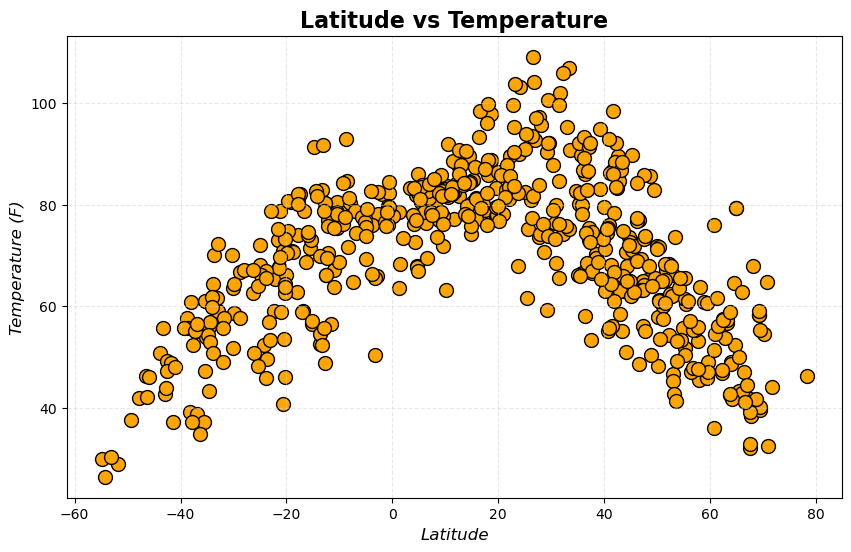

In [22]:
# Build scatter plot for latitude vs. temperature
# Step 1: Gather the Data
x = city_data_clean_df.Lat
y = city_data_clean_df['Max Temp']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="orange", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Save the figure
plt.savefig("C:\\Users\\polit\\Desktop\\Data Analytics Bootcamp\\homework\\ds_module_6\\Submission\\WeatherPy\\Lat_Temp_neyda.png")

# Step 6: Show plot
plt.show()

#### Latitude Vs. Humidity

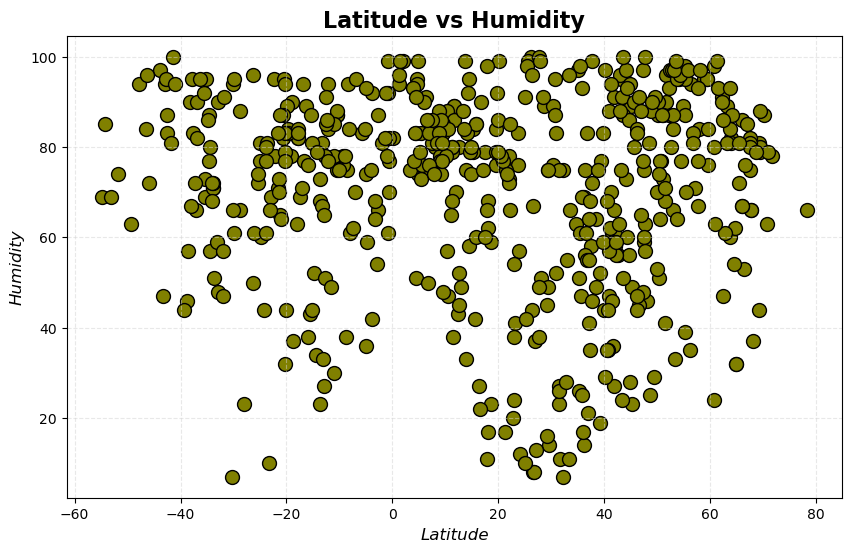

In [23]:
# Build the scatter plots for latitude vs. humidity
# Step 1: Gather the Data
x = city_data_clean_df.Lat
y = city_data_clean_df['Humidity']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="olive", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Save the figure
plt.savefig("C:\\Users\\polit\\Desktop\\Data Analytics Bootcamp\\homework\\ds_module_6\\Submission\\WeatherPy\\Lat_Hum_neyda.png")

# Step 6: Show plot
plt.show()

#### Latitude Vs. Cloudiness

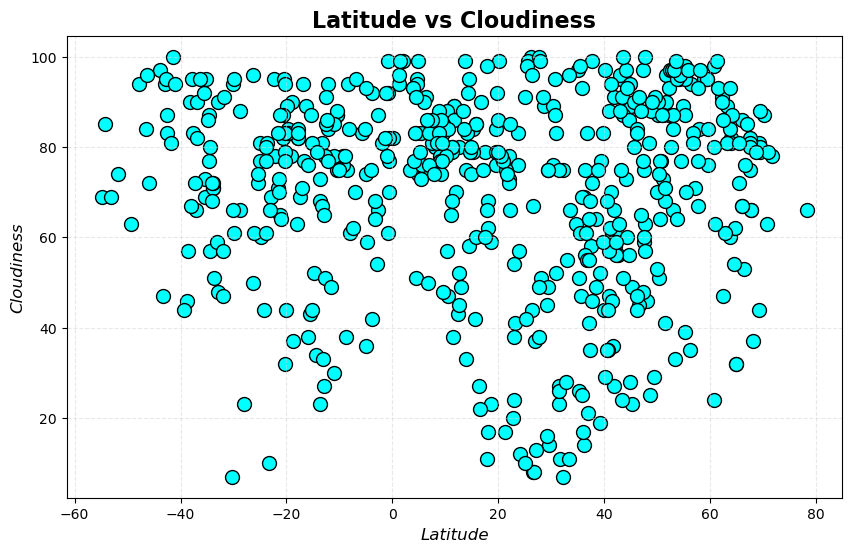

In [24]:
# Build the scatter plots for latitude vs. cloudiness
# Step 1: Gather the Data
x = city_data_clean_df.Lat
y = city_data_clean_df['Cloudiness']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="cyan", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Save the figure
plt.savefig("C:\\Users\\polit\\Desktop\\Data Analytics Bootcamp\\homework\\ds_module_6\\Submission\\WeatherPy\\Lat_Cloud_neyda.png")

# Step 6: Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

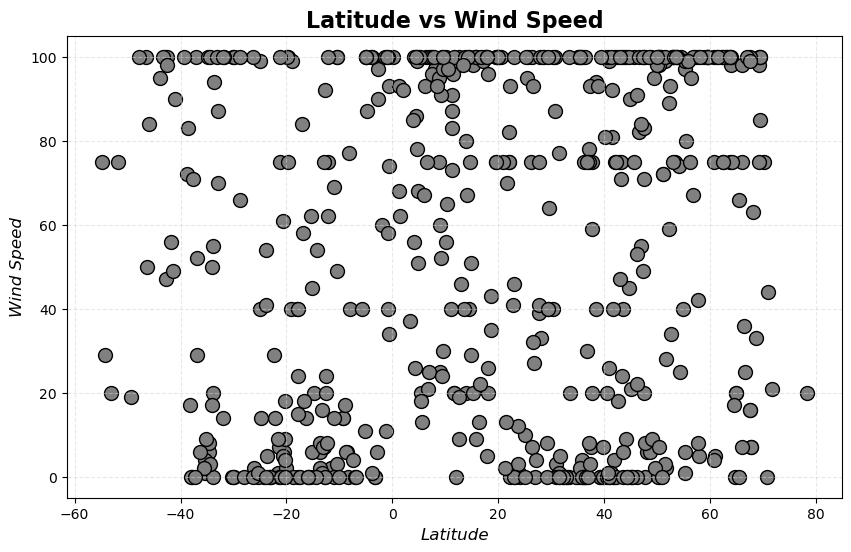

In [26]:
# Build the scatter plots for latitude vs. wind speed
# Step 1: Gather the Data
x = city_data_clean_df.Lat
y = city_data_clean_df['Wind Speed']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="grey", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Save the figure
plt.savefig("C:\\Users\\polit\\Desktop\\Data Analytics Bootcamp\\homework\\ds_module_6\\Submission\\WeatherPy\\Lat_Wind_neyda.png")

# Step 6: Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
# office hours helped me with this
def doRegression(x_values, y_values, x_title, y_title, annotation_pos): 

    # Step 1: Make the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))

    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit

    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    # Step 5: Show the figure
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_clean_df.loc[city_data_clean_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,udachny,66.4167,112.4000,47.03,53.0,53.0,36.0,RU,1.718658e+09
1,1,ukiah,39.1502,-123.2078,83.16,19.0,19.0,0.0,US,1.718658e+09
3,3,ola,59.5833,151.2833,48.99,76.0,76.0,100.0,RU,1.718658e+09
4,4,ribeira grande,38.5167,-28.7000,70.20,64.0,64.0,40.0,PT,1.718658e+09
5,5,kailua-kona,19.6406,-155.9956,83.28,76.0,76.0,75.0,US,1.718658e+09


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_clean_df.loc[city_data_clean_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,adamstown,-25.0660,-130.1015,72.12,81.0,81.0,99.0,PN,1.718658e+09
6,6,edinburgh of the seven seas,-37.0676,-12.3116,55.06,66.0,66.0,100.0,SH,1.718658e+09
11,11,tacna,-18.0056,-70.2483,62.80,63.0,63.0,40.0,PE,1.718658e+09
12,12,waitangi,-43.9535,-176.5597,50.83,97.0,97.0,95.0,NZ,1.718658e+09
13,13,bredasdorp,-34.5322,20.0403,55.92,77.0,77.0,6.0,ZA,1.718658e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4672979889083376


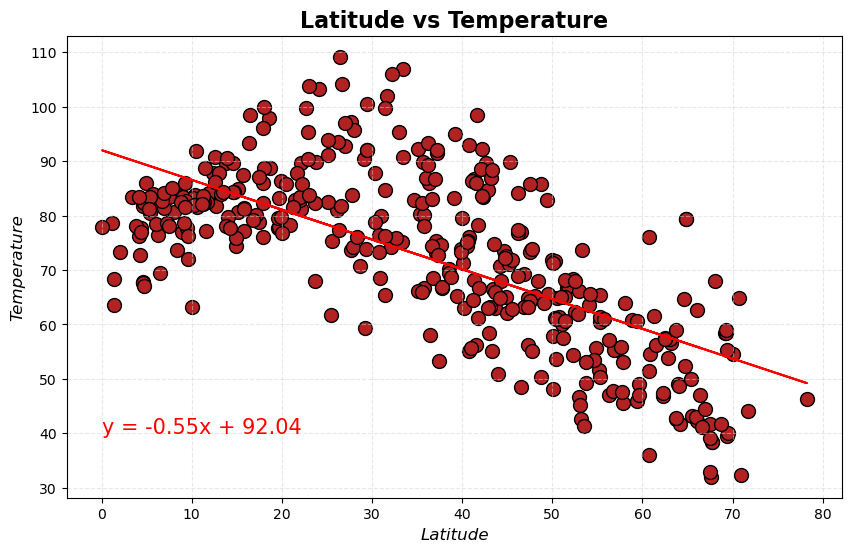

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"] 
doRegression(x_values, y_values, "Latitude", "Temperature", (0,40))

The r-squared is: 0.5769905268134022


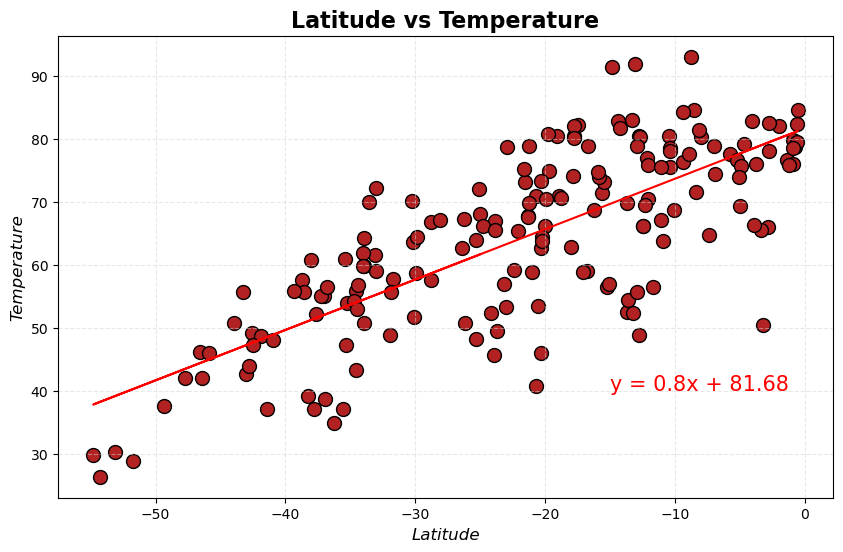

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"] 
doRegression(x_values, y_values, "Latitude", "Temperature", (-15,40))

**Discussion about the linear relationship:** The closer you get to the equator the hotter the temparture. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0002987045261821623


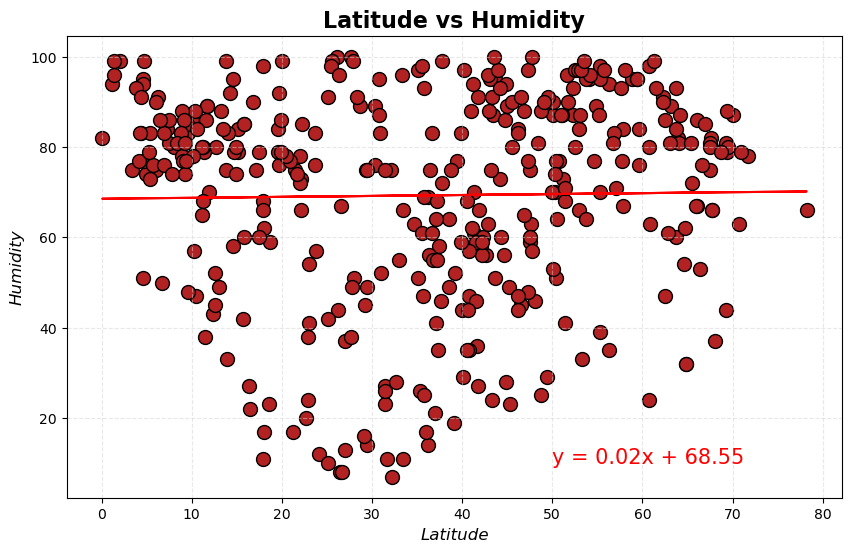

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"] 
doRegression(x_values, y_values, "Latitude", "Humidity", (50,10))

The r-squared is: 0.004314592127001564


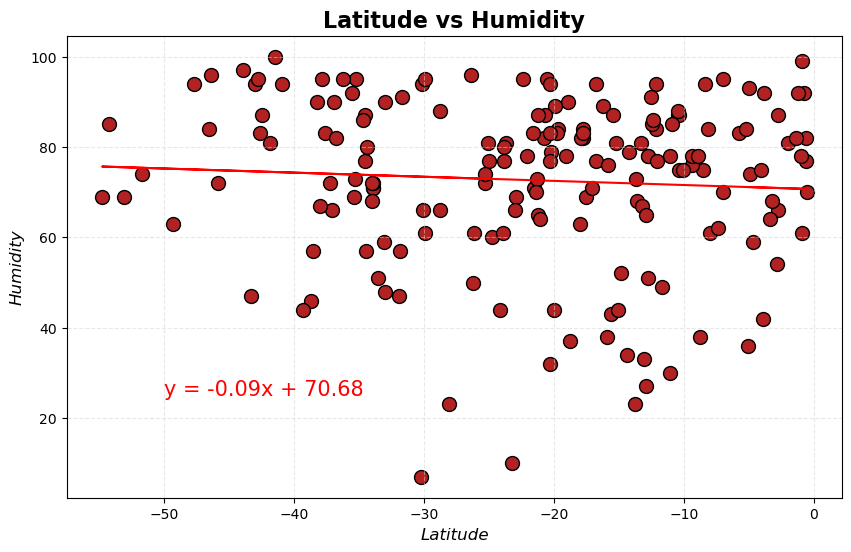

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"] 
doRegression(x_values, y_values, "Latitude", "Humidity", (-50,25))

**Discussion about the linear relationship:** There is no correlation between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0002987045261821623


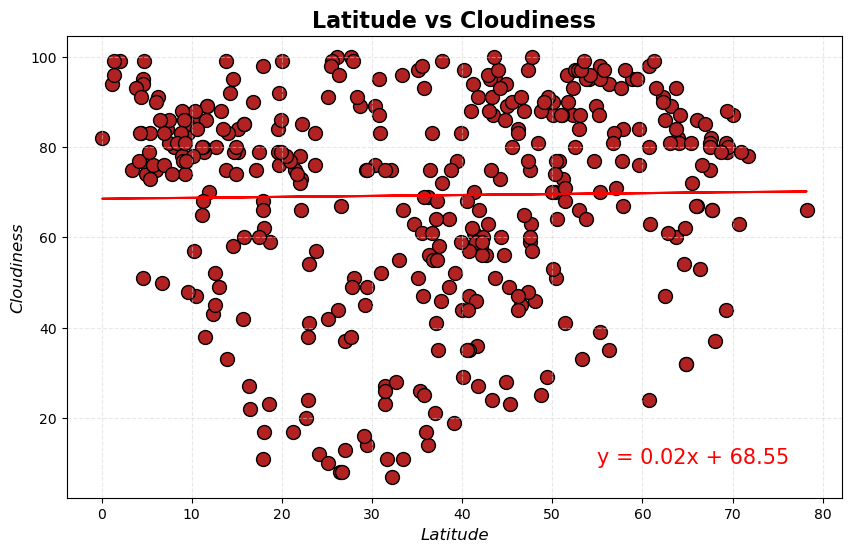

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"] 
doRegression(x_values, y_values, "Latitude", "Cloudiness", (55,10))

The r-squared is: 0.004314592127001564


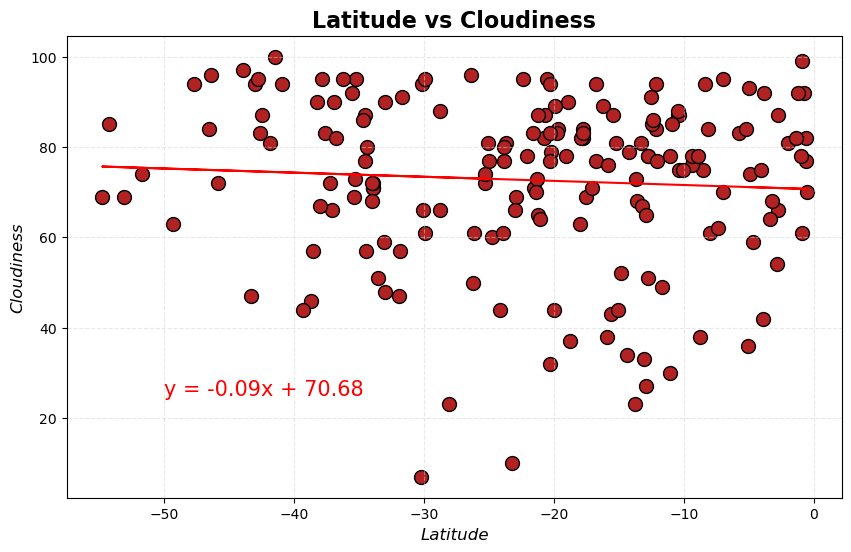

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"] 
doRegression(x_values, y_values, "Latitude", "Cloudiness", (-50,25))

**Discussion about the linear relationship:** There is no correlation between Latitude and Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002044208269976679


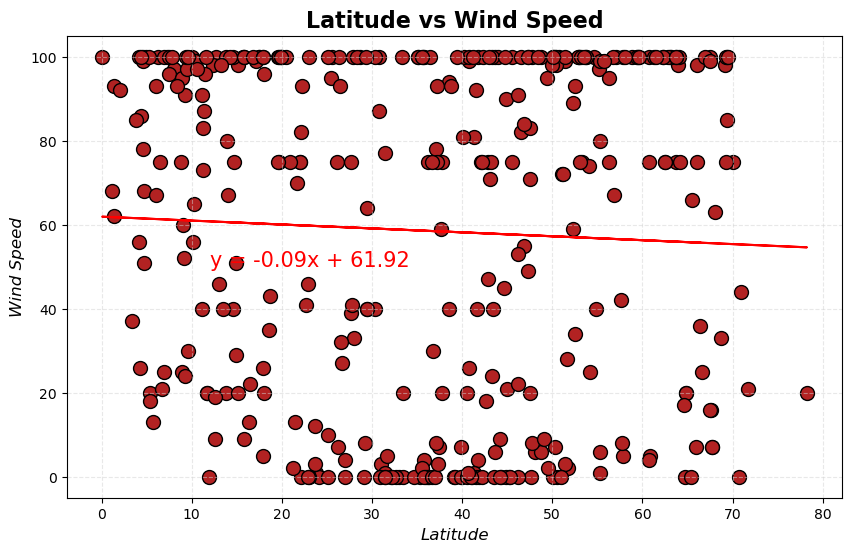

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"] 
doRegression(x_values, y_values, "Latitude", "Wind Speed", (12,50))

The r-squared is: 0.012825403696450905


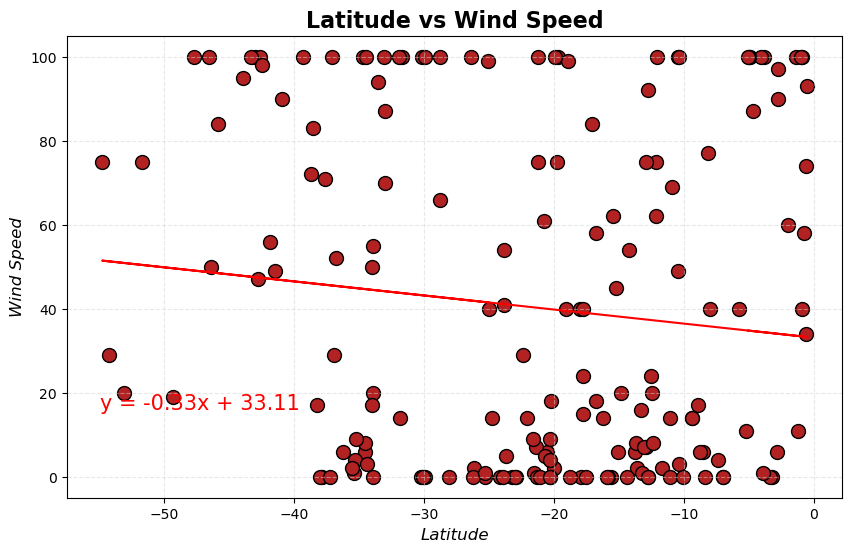

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"] 
doRegression(x_values, y_values, "Latitude", "Wind Speed", (-55,16))

**Discussion about the linear relationship:** There is no correlation between Latitude and Wind Speed. However, it appears that as you move from the southern hemisphere to the northern hemisphere, the wind spead tends to reduce.